In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import os
import matplotlib.pyplot as plt

import rnerf

In [2]:
dataset_path = os.path.expanduser("~/Documents/datasets/nerf_lego_dataset/")

rays = np.load(os.path.join(dataset_path, "computed_rays.npy"))
rays = torch.tensor(rays[:,:6])
rgbs = np.load(os.path.join(dataset_path, "computed_rgbs.npy"))
rgbs = torch.tensor(rgbs)

In [3]:
model = rnerf.RnerfModel([256, 128])

print(model)

RnerfModel(
  (positional_embedding): PositionalEmbedding()
  (direction_embedding): PositionalEmbedding()
  (main): Sequential(
    (0): Linear(in_features=120, out_features=256, bias=True)
    (1): ReLU()
    (hidden_layer_1): Linear(in_features=256, out_features=128, bias=True)
    (activation_layer_1): ReLU()
    (output_layer): Linear(in_features=128, out_features=3, bias=True)
    (output_activation): Sigmoid()
  )
)


In [4]:
img_size = 800*800


100%|██████████| 5/5 [00:08<00:00,  1.65s/it]


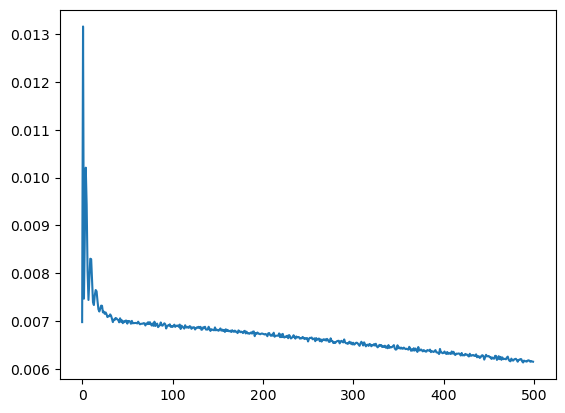

In [20]:
nb_epochs = 100
lr = 1e-4
nb_images = 5
losses = model.train(rays[:nb_images*img_size], rgbs[:nb_images*img_size], nb_epochs, img_size, lr)

plt.plot(losses)
plt.show()

In [26]:
print(rays[img_size:img_size+10, :3])

tensor([[-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888],
        [-1.3987,  3.5542,  1.2888]])


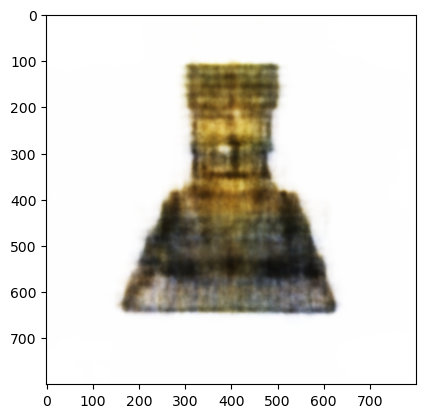

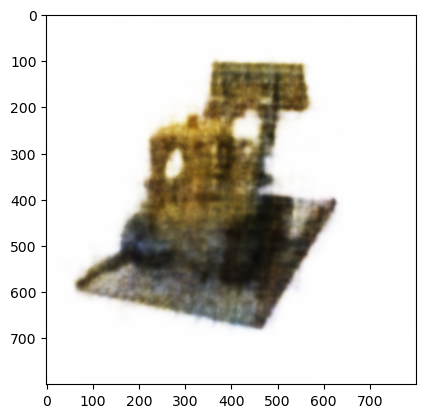

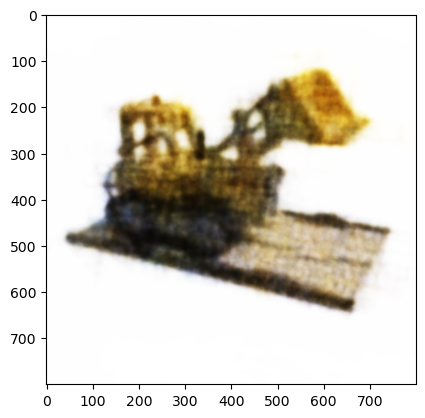

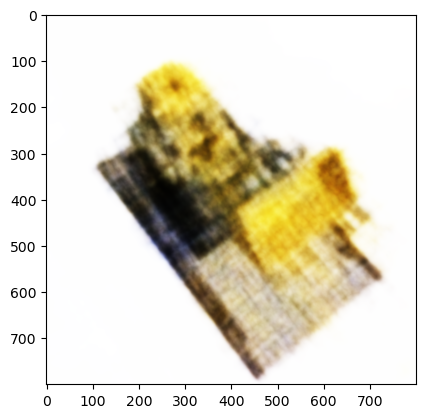

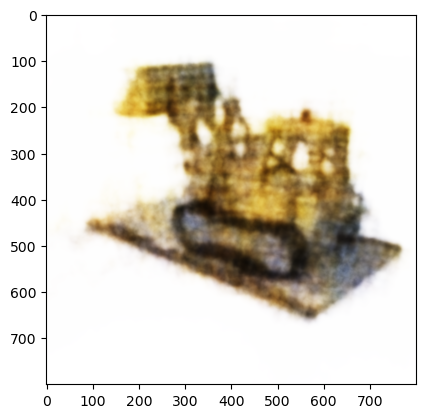

In [30]:
renderer = rnerf.RaysRenderer(model)

for img_index in range(5):
    img = renderer.render_rays((800,800), rays[img_index*img_size:(img_index+1)*img_size], 1)

    plt.imshow(img)
    plt.show()

In [22]:
model.save()